# importation librairie

In [1]:
# Manipulation des données
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

# importation de fichier

In [2]:
df = pd.read_csv('2016-building-energy-benchmarking.csv')
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


# EDA

In [3]:
df.shape

(3376, 46)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [6]:
import pandas as pd


# Define the function to check the type of each element
def check_type(x):
    return str(type(x))

# Apply check_type to each element in the DataFrame
types = df.applymap(check_type)

# Count the occurrences of each type in each column
type_counts = types.apply(pd.Series.value_counts)

# Filter columns that have exactly 2 types
columns_with_two_types = type_counts.columns[type_counts.notna().sum() == 2]

# Display the counts of types in these columns
result = type_counts[columns_with_two_types]
result


/tmp/ipykernel_105936/2647428578.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  types = df.applymap(check_type)


,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,Outlier
<class 'bool'>,NaN,NaN,NaN,NaN,NaN,NaN
<class 'float'>,9.0,20.0,1697.0,2780.0,3257.0,3344.0
<class 'int'>,NaN,NaN,NaN,NaN,NaN,NaN
<class 'str'>,3367.0,3356.0,1679.0,596.0,119.0,32.0


In [7]:
df['ListOfAllPropertyUseTypes'] = df['ListOfAllPropertyUseTypes'].astype(str)
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].astype(str)
df['SecondLargestPropertyUseType'] = df['SecondLargestPropertyUseType'].astype(str)
df['ThirdLargestPropertyUseType'] = df['ThirdLargestPropertyUseType'].astype(str)
df['YearsENERGYSTARCertified'] = df['YearsENERGYSTARCertified'].astype(str)
df['Outlier'] = df['Outlier'].astype(str)


In [8]:
unique_values = df['BuildingType' ].unique()
unique_values

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [9]:
unique_values = df['LargestPropertyUseType' ].unique()
unique_values

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Multifamily Housing', 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Non-Refrigerated Warehouse',
       'Other - Mall', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient', 'nan',
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Indu

In [10]:
unique_values = df['SecondLargestPropertyUseType' ].unique()
unique_values

array(['nan', 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Laboratory', 'Refrigerated Warehouse',
       'Non-Refrigerated Warehouse', 'Other - Education',
       'Vocational School', 'Retail Store',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Movie Theater', 'Supermarket/Grocery Store', 'Medical Office',
       'Other - Recreation', 'Convenience Store without Gas Station',
       'Performing Arts', 'College/University', 'Other - Restaurant/Bar',
       'Adult Education', 'Enclosed Mall', 'Multifamily Housing',
       'Bar/Nightclub', 'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Food Service', 'Worship Facility'

In [11]:
unique_values = df['PrimaryPropertyType'].unique()
unique_values

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

In [12]:
import pandas as pd

# Dictionnaire de mapping des types de propriété à leur catégorie correspondante
property_map = {
    'Hotel': 'Hébergement',
    'Other - Lodging/Residential': 'Hébergement',
    'Police Station': 'Services publics',
    'Courthouse': 'Services publics',
    'Fire Station': 'Services publics',
    'Prison/Incarceration': 'Services publics',
    'Other - Public Services': 'Services publics',
    'Other - Utility': 'Services publics',
    'K-12 School': 'Éducation',
    'College/University': 'Éducation',
    'Adult Education': 'Éducation',
    'Pre-school/Daycare': 'Éducation',
    'Other - Education': 'Éducation',
    'Medical Office': 'Santé',
    'Hospital (General Medical & Surgical)': 'Santé',
    'Other/Specialty Hospital': 'Santé',
    'Urgent Care/Clinic/Other Outpatient': 'Santé',
    'Office': 'Bureau',
    'Financial Office': 'Bureau',
    'Data Center': 'Bureau',
    'Laboratory': 'Bureau',
    'Retail Store': 'Commerce de détail',
    'Supermarket/Grocery Store': 'Commerce de détail',
    'Automobile Dealership': 'Commerce de détail',
    'Lifestyle Center': 'Commerce de détail',
    'Wholesale Club/Supercenter': 'Commerce de détail',
    'Strip Mall': 'Commerce de détail',
    'Other - Mall': 'Commerce de détail',
    'Other - Entertainment/Public Assembly': 'Divertissement et loisirs',
    'Library': 'Divertissement et loisirs',
    'Museum': 'Divertissement et loisirs',
    'Fitness Center/Health Club/Gym': 'Divertissement et loisirs',
    'Social/Meeting Hall': 'Divertissement et loisirs',
    'Performing Arts': 'Divertissement et loisirs',
    'Convention Center': 'Divertissement et loisirs',
    'Movie Theater': 'Divertissement et loisirs',
    'Other - Recreation': 'Divertissement et loisirs',
    'Distribution Center': 'Logistique et stockage',
    'Non-Refrigerated Warehouse': 'Logistique et stockage',
    'Refrigerated Warehouse': 'Logistique et stockage',
    'Self-Storage Facility': 'Logistique et stockage',
    'Manufacturing/Industrial Plant': 'Industrie',
    'Restaurant': 'Restauration et services alimentaires',
    'Other - Restaurant/Bar': 'Restauration et services alimentaires',
    'Food Service': 'Restauration et services alimentaires',
    'Repair Services (Vehicle, Shoe, Locksmith, etc)': 'Services personnels',
    'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Services personnels',
    'Multifamily Housing': 'Logement résidentiel',
    'Residence Hall/Dormitory': 'Logement résidentiel',
    'Senior Care Community': 'Logement résidentiel',
    'Residential Care Facility': 'Logement résidentiel',
    'Other': 'Autres',
    'Other - Services': 'Autres',
    'Worship Facility': 'Autres',
    'Bank Branch': 'Autres',
    'Other - Utility': 'Autres',
    'Parking': 'Autres',
    'Hotel': 'Hébergement',
    'Self-Storage Facility': 'Logistique et entreposage',
    'Small- and Mid-Sized Office': 'Bureau',
    'High-Rise Multifamily': 'Logement résidentiel (grande hauteur)',
    'Low-Rise Multifamily': 'Logement résidentiel (basse hauteur)',
    'Mid-Rise Multifamily': 'Logement résidentiel (moyenne hauteur)',
    'Restaurant': 'Restauration et services alimentaires',
    'Mixed Use Property': 'Propriété mixte'
    #'nan': 'Autres'
}

# Ajouter la colonne 'Property Générale' au DataFrame existant df
df['Property Générale'] = df['LargestPropertyUseType'].map(property_map)

# Remplacer les valeurs NaN restantes par 'Autres'
df['Property Générale'].fillna('Autres', inplace=True)


# Afficher le résultat
df

/tmp/ipykernel_105936/3483910029.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Property Générale'].fillna('Autres', inplace=True)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Property Générale
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,nan,NaN,nan,NaN,nan,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,nan,249.98,2.83,Hébergement
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,nan,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,nan,295.86,2.86,Hébergement
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,nan,NaN,nan,NaN,nan,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,nan,2089.28,2.19,Hébergement
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,nan,NaN,nan,NaN,nan,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,nan,286.43,4.67,Hébergement
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,nan,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,nan,505.01,2.88,Hébergement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,nan,NaN,nan,NaN,nan,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,nan,20.94,1.70,Bureau
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,nan,NaN,nan,NaN,nan,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,nan,32.17,2.01,Divertissement et loisirs
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness

In [13]:
import pandas as pd

# Dictionnaire de mapping des types de propriété à leur catégorie correspondante
property_map = {
    'Hotel': 'Hébergement',
    'Other - Lodging/Residential': 'Hébergement',
    'Police Station': 'Services publics',
    'Courthouse': 'Services publics',
    'Fire Station': 'Services publics',
    'Prison/Incarceration': 'Services publics',
    'Other - Public Services': 'Services publics',
    'Other - Utility': 'Services publics',
    'K-12 School': 'Éducation',
    'College/University': 'Éducation',
    'Adult Education': 'Éducation',
    'Pre-school/Daycare': 'Éducation',
    'Other - Education': 'Éducation',
    'Medical Office': 'Santé',
    'Hospital (General Medical & Surgical)': 'Santé',
    'Other/Specialty Hospital': 'Santé',
    'Urgent Care/Clinic/Other Outpatient': 'Santé',
    'Office': 'Bureau',
    'Financial Office': 'Bureau',
    'Data Center': 'Bureau',
    'Laboratory': 'Bureau',
    'Retail Store': 'Commerce de détail',
    'Supermarket/Grocery Store': 'Commerce de détail',
    'Automobile Dealership': 'Commerce de détail',
    'Lifestyle Center': 'Commerce de détail',
    'Wholesale Club/Supercenter': 'Commerce de détail',
    'Strip Mall': 'Commerce de détail',
    'Other - Mall': 'Commerce de détail',
    'Other - Entertainment/Public Assembly': 'Divertissement et loisirs',
    'Library': 'Divertissement et loisirs',
    'Museum': 'Divertissement et loisirs',
    'Fitness Center/Health Club/Gym': 'Divertissement et loisirs',
    'Social/Meeting Hall': 'Divertissement et loisirs',
    'Performing Arts': 'Divertissement et loisirs',
    'Convention Center': 'Divertissement et loisirs',
    'Movie Theater': 'Divertissement et loisirs',
    'Other - Recreation': 'Divertissement et loisirs',
    'Distribution Center': 'Logistique et stockage',
    'Non-Refrigerated Warehouse': 'Logistique et stockage',
    'Refrigerated Warehouse': 'Logistique et stockage',
    'Self-Storage Facility': 'Logistique et stockage',
    'Manufacturing/Industrial Plant': 'Industrie',
    'Restaurant': 'Restauration et services alimentaires',
    'Other - Restaurant/Bar': 'Restauration et services alimentaires',
    'Food Service': 'Restauration et services alimentaires',
    'Repair Services (Vehicle, Shoe, Locksmith, etc)': 'Services personnels',
    'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Services personnels',
    'Multifamily Housing': 'Logement résidentiel',
    'Residence Hall/Dormitory': 'Logement résidentiel',
    'Senior Care Community': 'Logement résidentiel',
    'Residential Care Facility': 'Logement résidentiel',
    'Other': 'Autres',
    'Other - Services': 'Autres',
    'Worship Facility': 'Autres',
    'Bank Branch': 'Autres',
    'Other - Utility': 'Autres',
    'Parking': 'Autres',
    'Hotel': 'Hébergement',
    'Self-Storage Facility': 'Logistique et entreposage',
    'Small- and Mid-Sized Office': 'Bureau',
    'High-Rise Multifamily': 'Logement résidentiel (grande hauteur)',
    'Low-Rise Multifamily': 'Logement résidentiel (basse hauteur)',
    'Mid-Rise Multifamily': 'Logement résidentiel (moyenne hauteur)',
    'Restaurant': 'Restauration et services alimentaires',
    'Mixed Use Property': 'Propriété mixte',
    'nan': 'Autres',
}

# Ajouter la colonne 'Property Générale' au DataFrame existant df
df['Property Générale'] = df['LargestPropertyUseType'].map(property_map)

# Remplacer les valeurs NaN restantes par 'Autres'
df['Property Générale'].fillna('Autres', inplace=True)


# Afficher le résultat
df

/tmp/ipykernel_105936/2741423846.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Property Générale'].fillna('Autres', inplace=True)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Property Générale
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,nan,NaN,nan,NaN,nan,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,nan,249.98,2.83,Hébergement
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,nan,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,nan,295.86,2.86,Hébergement
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,nan,NaN,nan,NaN,nan,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,nan,2089.28,2.19,Hébergement
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,nan,NaN,nan,NaN,nan,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,nan,286.43,4.67,Hébergement
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,nan,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,nan,505.01,2.88,Hébergement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,nan,NaN,nan,NaN,nan,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,nan,20.94,1.70,Bureau
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,nan,NaN,nan,NaN,nan,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,nan,32.17,2.01,Divertissement et loisirs
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness

In [14]:
import pandas as pd

# Liste des colonnes à supprimer
columns_to_drop = [
    'OSEBuildingID', 'DataYear', 'PropertyName', 'Address', 'City', 'State',
    'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'DefaultData', 'Comments',
    'ComplianceStatus', 'Outlier','ThirdLargestPropertyUseType','SecondLargestPropertyUseType','YearsENERGYSTARCertified','ListOfAllPropertyUseTypes'
]

# Suppression des colonnes non pertinentes
df_cleaned= df.drop(columns=columns_to_drop)

# Afficher le DataFrame résultant
df_cleaned

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Property Générale
0,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,Hébergement
1,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,Hébergement
2,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19,Hébergement
3,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67,Hébergement
4,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,68009.0,0.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88,Hébergement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,0,12294,Office,12294.0,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,Bureau
3372,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,0,16000,Other - Recreation,16000.0,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,Divertissement et loisirs
3373,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,13157,Other - Recreation,7583.0,5574.0,0.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,Divertissement et loisirs
3374,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,0,14101,Other - Recreation,6601.0,6501.0,484.0,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,Divertissement et loisirs


In [15]:
nan_counts = df_cleaned.isna().sum()
print(nan_counts)

BuildingType                          0
PrimaryPropertyType                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseTypeGFA    1697
ThirdLargestPropertyUseTypeGFA     2780
ENERGYSTARScore                     843
SiteEUI(kBtu/sf)                      7
SiteEUIWN(kBtu/sf)                    6
SourceEUI(kBtu/sf)                    9
SourceEUIWN(kBtu/sf)                  9
SiteEnergyUse(kBtu)                   5
SiteEnergyUseWN(kBtu)                 6
SteamUse(kBtu)                        9
Electricity(kWh)                      9
Electricity(kBtu)                     9
NaturalGas(therms)                    9
NaturalGas(kBtu)                      9


In [16]:
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns

# Remplacer les NaN par la médiane dans les colonnes numériques
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(lambda x: x.fillna(x.median()))

df_cleaned

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Property Générale
0,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,10664.0,5043.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,Hébergement
1,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,Hébergement
2,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,10664.0,5043.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19,Hébergement
3,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,10664.0,5043.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67,Hébergement
4,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,68009.0,0.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88,Hébergement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,0,12294,Office,12294.0,10664.0,5043.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,Bureau
3372,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,0,16000,Other - Recreation,16000.0,10664.0,5043.0,75.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,Divertissement et loisirs
3373,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,13157,Other - Recreation,7583.0,5574.0,0.0,75.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,Divertissement et loisirs
3374,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,0,14101,Other - Recreation,6601.0,6501.0,484.0,75.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,Divertissement et loisirs


In [17]:
nan_counts = df_cleaned.isna().sum()
print(nan_counts)

BuildingType                       0
PrimaryPropertyType                0
Neighborhood                       0
YearBuilt                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseType             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
ENERGYSTARScore                    0
SiteEUI(kBtu/sf)                   0
SiteEUIWN(kBtu/sf)                 0
SourceEUI(kBtu/sf)                 0
SourceEUIWN(kBtu/sf)               0
SiteEnergyUse(kBtu)                0
SiteEnergyUseWN(kBtu)              0
SteamUse(kBtu)                     0
Electricity(kWh)                   0
Electricity(kBtu)                  0
NaturalGas(therms)                 0
NaturalGas(kBtu)                   0
TotalGHGEmissions                  0
GHGEmissionsIntensity              0
P

In [18]:
nan_values = df[df['Property Générale'].isna()]

nan_values

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Property Générale


In [19]:
df_cleaned

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Property Générale
0,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,10664.0,5043.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,Hébergement
1,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,Hébergement
2,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,10664.0,5043.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19,Hébergement
3,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,10664.0,5043.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67,Hébergement
4,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,68009.0,0.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88,Hébergement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,0,12294,Office,12294.0,10664.0,5043.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,Bureau
3372,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,0,16000,Other - Recreation,16000.0,10664.0,5043.0,75.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,Divertissement et loisirs
3373,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,13157,Other - Recreation,7583.0,5574.0,0.0,75.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,Divertissement et loisirs
3374,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,0,14101,Other - Recreation,6601.0,6501.0,484.0,75.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,Divertissement et loisirs


In [20]:
df_cleaned['Targetlog'] = np.log(df_cleaned['TotalGHGEmissions'])

# Afficher le résultat
df_cleaned

/home/vicky/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/vicky/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Property Générale,Targetlog
0,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,10664.0,5043.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,Hébergement,5.521381
1,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,Hébergement,5.689886
2,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,10664.0,5043.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19,Hébergement,7.644575
3,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,10664.0,5043.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67,Hébergement,5.657494
4,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,68009.0,0.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88,Hébergement,6.224578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,0,12294,Office,12294.0,10664.0,5043.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,Bureau,3.041661
3372,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,0,16000,Other - Recreation,16000.0,10664.0,5043.0,75.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,Divertissement et loisirs,3.471034
3373,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,13157,Other - Recreation,7583.0,5574.0,0.0,75.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,Divertissement et loisirs,5.409590
3374,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,0,14101,Other - Recreation,6601.0,6501.0,484.0,75.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,Divertissement et loisirs,3.096030


In [21]:
missing_values = df_cleaned[df_cleaned['Targetlog'].isnull()]
missing_values

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Property Générale,Targetlog
3206,NonResidential,Small- and Mid-Sized Office,CENTRAL,2013,1.0,6,52000,0,52000,Office,48159.0,10664.0,5043.0,100.0,7.1,5.0,2.0,-2.1,342726.0938,240132.0938,0.0,-33826.80078,-115417.0,0.0,0.0,-0.8,-0.02,Bureau,NaN


In [22]:
df_cleaned= df_cleaned.dropna(subset=['Targetlog'])

In [23]:
df_cleaned

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Property Générale,Targetlog
0,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,10664.0,5043.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,Hébergement,5.521381
1,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,Hébergement,5.689886
2,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,10664.0,5043.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19,Hébergement,7.644575
3,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,10664.0,5043.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67,Hébergement,5.657494
4,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,68009.0,0.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88,Hébergement,6.224578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,0,12294,Office,12294.0,10664.0,5043.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,Bureau,3.041661
3372,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,0,16000,Other - Recreation,16000.0,10664.0,5043.0,75.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,Divertissement et loisirs,3.471034
3373,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,13157,Other - Recreation,7583.0,5574.0,0.0,75.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,Divertissement et loisirs,5.409590
3374,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,0,14101,Other - Recreation,6601.0,6501.0,484.0,75.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,Divertissement et loisirs,3.096030


In [24]:
target = 'Targetlog'

# Afficher les lignes avec des valeurs infinies dans la colonne cible
infinite_values = df_cleaned[df_cleaned[target].isin([np.inf, -np.inf])]
print(infinite_values[target])

28     -inf
152    -inf
304    -inf
513    -inf
746    -inf
760    -inf
1323   -inf
1361   -inf
1549   -inf
Name: Targetlog, dtype: float64


In [25]:
df_cleaned

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Property Générale,Targetlog
0,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,10664.0,5043.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,Hébergement,5.521381
1,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,Hébergement,5.689886
2,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,10664.0,5043.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19,Hébergement,7.644575
3,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,10664.0,5043.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67,Hébergement,5.657494
4,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,68009.0,0.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88,Hébergement,6.224578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,0,12294,Office,12294.0,10664.0,5043.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,Bureau,3.041661
3372,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,0,16000,Other - Recreation,16000.0,10664.0,5043.0,75.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,Divertissement et loisirs,3.471034
3373,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,13157,Other - Recreation,7583.0,5574.0,0.0,75.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,Divertissement et loisirs,5.409590
3374,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,0,14101,Other - Recreation,6601.0,6501.0,484.0,75.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,Divertissement et loisirs,3.096030


In [26]:
df_cleaned[target].replace([np.inf, -np.inf], np.nan, inplace=True)

# Supprimer les lignes où la colonne cible contient des NaN (qui étaient des valeurs infinies)
df_cleaned = df_cleaned.dropna(subset=[target])

/tmp/ipykernel_105936/973521293.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[target].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_105936/973521293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[target].replace([np.inf, -np.inf], np.nan, inplace=True)


In [27]:
target = 'Targetlog'

# Afficher les lignes avec des valeurs infinies dans la colonne cible
infinite_values = df_cleaned[df_cleaned[target].isin([np.inf, -np.inf])]
print(infinite_values[target])

Series([], Name: Targetlog, dtype: float64)


In [28]:
df_cleaned


,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Property Générale,Targetlog
0,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,10664.0,5043.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,Hébergement,5.521381
1,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,Hébergement,5.689886
2,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,10664.0,5043.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19,Hébergement,7.644575
3,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,10664.0,5043.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67,Hébergement,5.657494
4,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,68009.0,0.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88,Hébergement,6.224578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,0,12294,Office,12294.0,10664.0,5043.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,Bureau,3.041661
3372,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,0,16000,Other - Recreation,16000.0,10664.0,5043.0,75.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,Divertissement et loisirs,3.471034
3373,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,13157,Other - Recreation,7583.0,5574.0,0.0,75.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,Divertissement et loisirs,5.409590
3374,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,0,14101,Other - Recreation,6601.0,6501.0,484.0,75.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,Divertissement et loisirs,3.096030


In [29]:
nan_values = df_cleaned.isna().sum().sum()
nan_values

0

In [30]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df

# Identifier les lignes avec des valeurs NaN
rows_with_nan = df_cleaned[df_cleaned.isna().any(axis=1)]

# Afficher les lignes avec des valeurs NaN
print("Lignes contenant des valeurs NaN :")
rows_with_nan


Lignes contenant des valeurs NaN :


,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Property Générale,Targetlog


In [31]:
df_cleaned.to_csv('CO2.csv', index=False)


# Modele

In [32]:
from sklearn.model_selection import train_test_split

# Sélectionner la colonne cible et les caractéristiques
target = 'TotalGHGEmissions'
features = ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
            'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
            'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
            'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
            'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
            'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
            'NaturalGas(kBtu)', 'GHGEmissionsIntensity']

# Filtrer le dataset pour les colonnes pertinentes
data_filtered = df_cleaned[features + [target]].dropna()

# Diviser les données en ensembles d'entraînement et de test
X = data_filtered[features]
y = data_filtered[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entraîner un modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_linear = linear_model.predict(X_test)

# Évaluer les performances du modèle
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, r2_linear

(0.17468361708679586, 0.9999994651529763)

In [34]:
from sklearn.neighbors import KNeighborsRegressor

# Entraîner un modèle KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_knn = knn_model.predict(X_test)

# Évaluer les performances du modèle
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

mse_knn, r2_knn

(74259.15318732343, 0.7726330166014631)

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Entraîner un modèle Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test avec Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Évaluer les performances du modèle Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, r2_dt

(354147.10259495536, -0.08432906840759302)

In [36]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test avec Random Forest
y_pred_rf = rf_model.predict(X_test)

# Évaluer les performances du modèle Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")

Random Forest - MSE: 107034.83076643663, R²: 0.6722803109732746


In [37]:
# Entraîner un modèle CatBoost
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test avec CatBoost
y_pred_catboost = catboost_model.predict(X_test)

# Évaluer les performances du modèle CatBoost
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost - MSE: {mse_catboost}, R²: {r2_catboost}")

CatBoost - MSE: 172469.46141917247, R²: 0.4719322872922058


Scores de validation croisée : [0.74100159 0.95927481 0.81885838 0.8013175  0.49568176]
Moyenne des scores de validation croisée : 0.7632268080034124
Erreur Quadratique Moyenne : 168662.18414757267
Score R² : 0.4835894246422885


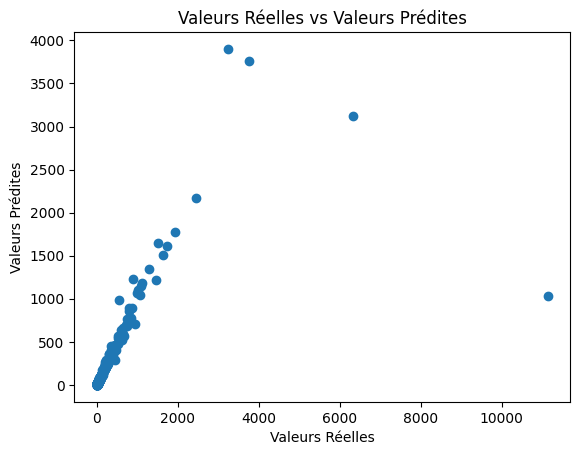

In [38]:
#Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Modèle CatBoost
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
model.fit(X_train, y_train)

#Validation croisée
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Scores de validation croisée : {cv_scores}')
print(f'Moyenne des scores de validation croisée : {np.mean(cv_scores)}')

#Prédictions
y_pred = model.predict(X_test)

#Métriques
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Erreur Quadratique Moyenne : {mse}')
print(f'Score R² : {r2}')

#Visualisation des résultats
plt.scatter(y_test, y_pred)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Réelles vs Valeurs Prédites')
plt.show()

In [39]:
#Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

#Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#Prédiction sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

#Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.17468362386458036
R^2 Score: 0.9999994651529556


In [40]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Définir les paramètres de la grille de recherche
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialiser le modèle KNN Regressor
knn = KNeighborsRegressor()

# Configurer la recherche de grille avec validation croisée
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Entraîner le modèle sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédire sur l'ensemble de test avec le meilleur modèle trouvé
best_knn_model = grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

# Évaluer les performances du modèle
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Résultats des performances
print(f"MSE: {mse_knn}")
print(f"R2: {r2_knn}")

# Validation croisée
cv_scores = cross_val_score(best_knn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

print(f"Validation croisée MSE: {cv_mse}")


Fitting 3 folds for each of 40 candidates, totalling 120 fits
Meilleurs paramètres : {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
MSE: 43913.09325175854
R2: 0.8655467088459151
Validation croisée MSE: 70798.41587430541


/home/vicky/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que X_train, X_test, y_train, y_test sont déjà définis

# Définir les modèles de base
estimators = [
    ('lr', LinearRegression()),
    ('ridge', Ridge(alpha=1.0))
]

# Définir le modèle de stacking
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=KNeighborsRegressor()
)

# Entraîner le modèle de stacking
stacking_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_stacking = stacking_model.predict(X_test)

# Évaluer les performances du modèle de stacking
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f"MSE Stacking: {mse_stacking}")
print(f"R2 Stacking: {r2_stacking}")

# Validation croisée
cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores

print(f"Validation croisée MSE Stacking: {cv_mse}")


MSE Stacking: 4674.521837554892
R2 Stacking: 0.98568752963888
Validation croisée MSE Stacking: 70798.41587430541


In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que X_train, X_test, y_train, y_test sont déjà définis

# Définir les modèles de base
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Définir le modèle de stacking
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Entraîner le modèle de stacking
stacking_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_stacking = stacking_model.predict(X_test)

# Évaluer les performances du modèle de stacking
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f"MSE Stacking avec RandomForest et LinearRegression : {mse_stacking}")
print(f"R2 Stacking avec RandomForest et LinearRegression : {r2_stacking}")

# Validation croisée
cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

print(f"Validation croisée MSE Stacking avec RandomForest et LinearRegression : {cv_mse}")


MSE Stacking avec RandomForest et LinearRegression : 173842.22863405745
R2 Stacking avec RandomForest et LinearRegression : 0.4677291429367961
Validation croisée MSE Stacking avec RandomForest et LinearRegression : 28714.964054080814


In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Modèle de régression linéaire
model = LinearRegression()

# Sélection récursive avec élimination
rfe = RFE(estimator=model, n_features_to_select=10)  # nombre de caractéristiques à sélectionner
rfe.fit(X, y)

# Caractéristiques sélectionnées
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['NumberofBuildings', 'NumberofFloors', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'GHGEmissionsIntensity'],
      dtype='object')


In [44]:
from sklearn.feature_selection import SelectKBest, f_regression

# Sélection des caractéristiques avec ANOVA
selector = SelectKBest(score_func=f_regression, k=10)  # nombre de caractéristiques à sélectionner
selector.fit(X, y)

# Caractéristiques sélectionnées
selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)'],
      dtype='object')


In [45]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd


# Prétraitement des données
#df = df.dropna()
df_cleaned = pd.get_dummies(df_cleaned)

# Sélection des caractéristiques (X) et de la cible (y)
X = df_cleaned.drop(['TotalGHGEmissions','Targetlog'], axis=1)
y = df_cleaned['Targetlog']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Decision Tree
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                                             Feature  Importance
15                             SiteEnergyUseWN(kBtu)    0.629990
19                                NaturalGas(therms)    0.210498
20                                  NaturalGas(kBtu)    0.067782
14                               SiteEnergyUse(kBtu)    0.036763
16                                    SteamUse(kBtu)    0.019370
..                                               ...         ...
103        LargestPropertyUseType_Other - Recreation    0.000000
104    LargestPropertyUseType_Other - Restaurant/Bar    0.000000
106           LargestPropertyUseType_Other - Utility    0.000000
107  LargestPropertyUseType_Other/Specialty Hospital    0.000000
81               LargestPropertyUseType_Fire Station    0.000000

[143 rows x 2 columns]


In [46]:
from sklearn.inspection import permutation_importance

# Trier par importance
permutation_importance_df_sorted = feature_importance_df.query('Importance > 0')

# Afficher le DataFrame trié
permutation_importance_df_sorted.head(10)

,Feature,Importance
15,SiteEnergyUseWN(kBtu),0.629990
19,NaturalGas(therms),0.210498
20,NaturalGas(kBtu),0.067782
14,SiteEnergyUse(kBtu),0.036763
16,SteamUse(kBtu),0.019370
21,GHGEmissionsIntensity,0.018066
17,Electricity(kWh),0.007563
18,Electricity(kBtu),0.006554
10,SiteEUI(kBtu/sf),0.000994
142,Property Générale_Éducation,0.000507


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso  # Importer Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélection des features importantes avec un modèle de régression (ex: Lasso)
selector = SelectFromModel(estimator=Lasso(alpha=0.1, random_state=42))
selector.fit(X_train, y_train)

# Appliquer la sélection des features aux ensembles d'entraînement et de test
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Création du pipeline avec mise à l'échelle des features et KNN Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn_regressor', KNeighborsRegressor(n_neighbors=5))
])

# Entraînement du modèle sur les features sélectionnées
pipeline.fit(X_train_selected, y_train)

# Prédiction sur l'ensemble de test
y_pred = pipeline.predict(X_test_selected)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error: 0.7371906456319183
R-squared (R2): 0.6875041534246483


/home/vicky/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.173e+03, tolerance: 6.019e-01
  model = cd_fast.enet_coordinate_descent(


In [48]:
cv_scores = cross_val_score(pipeline, X_train_selected, y_train, cv=5, scoring='r2')
cv_scores

array([0.7183915 , 0.70869313, 0.70429582, 0.66805894, 0.77047998])

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso  # Importer Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélection des features importantes avec un modèle de régression (ex: Lasso)
selector = SelectFromModel(estimator=Lasso(alpha=0.1, random_state=42))
selector.fit(X_train, y_train)

# Appliquer la sélection des features aux ensembles d'entraînement et de test
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Création du pipeline avec mise à l'échelle des features et KNN Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree_regressor', DecisionTreeRegressor(random_state=42))
])

# Entraînement du modèle sur les features sélectionnées
pipeline.fit(X_train_selected, y_train)

# Prédiction sur l'ensemble de test
y_pred = pipeline.predict(X_test_selected)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

cv_scores = cross_val_score(pipeline, X_train_selected, y_train, cv=5, scoring='r2')

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')
cv_scores

Mean Squared Error: 0.45087967170533655
R-squared (R2): 0.8088716595251988


/home/vicky/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.173e+03, tolerance: 6.019e-01
  model = cd_fast.enet_coordinate_descent(


array([0.78023306, 0.82996066, 0.85345214, 0.82836129, 0.82263198])

In [50]:
cv_scores = cross_val_score(pipeline, X_train_selected, y_train, cv=5, scoring='r2')
cv_scores

array([0.78023306, 0.82996066, 0.85345214, 0.82836129, 0.82263198])

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor  # Ajout de l'import pour DecisionTreeRegressor

# Supposons que X et y soient vos données d'entraînement et de cible respectivement
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélection des features importantes avec un modèle de régression (ex: Lasso)
selector = SelectFromModel(estimator=Lasso(alpha=0.5, random_state=42))
selector.fit(X_train, y_train)

# Appliquer la sélection des features aux ensembles d'entraînement et de test
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Création du pipeline avec mise à l'échelle des features et KNN Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree_regressor', DecisionTreeRegressor(random_state=42))
])

# Entraînement du modèle sur les features sélectionnées
pipeline.fit(X_train_selected, y_train)

# Calcul du score sur les données d'entraînement
train_score = pipeline.score(X_train_selected, y_train)

# Prédiction sur l'ensemble de test
y_pred = pipeline.predict(X_test_selected)

# Évaluation du modèle sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Validation croisée
cv_scores = cross_val_score(pipeline, X_train_selected, y_train, cv=5, scoring='r2')

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) on test set: {r2}')
print(f'Training set score: {train_score}')
print(f'Cross-validation scores: {cv_scores}')


Mean Squared Error: 0.5864332640620282
R-squared (R2) on test set: 0.7514103571459159
Training set score: 0.9973683466192713
Cross-validation scores: [0.74128146 0.76064852 0.75172765 0.79815363 0.77932186]


/home/vicky/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+03, tolerance: 6.019e-01
  model = cd_fast.enet_coordinate_descent(


In [52]:
mean_cross_val_score = np.mean(cv_scores)
difference = mean_cross_val_score - train_score

difference

-0.23114172156268575

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélection des features importantes avec Lasso avec régularisation plus forte
selector = SelectFromModel(estimator=Lasso(alpha=0.5, random_state=42))
selector.fit(X_train, y_train)

# Appliquer la sélection des features aux ensembles d'entraînement et de test
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Création du pipeline avec mise à l'échelle des features et Random Forest Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entraînement du modèle sur les features sélectionnées
pipeline.fit(X_train_selected, y_train)

# Calcul du score sur les données d'entraînement
train_score = pipeline.score(X_train_selected, y_train)

# Prédiction sur l'ensemble de test
y_pred = pipeline.predict(X_test_selected)

# Évaluation du modèle sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Validation croisée avec plus de plis
cv_scores = cross_val_score(pipeline, X_train_selected, y_train, cv=10, scoring='r2')

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) on test set: {r2}')
print(f'Training set score: {train_score}')
print(f'Cross-validation scores: {cv_scores}')
print(f'Difference: {train_score - np.mean(cv_scores)}')


/home/vicky/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+03, tolerance: 6.019e-01
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 0.4269148825402609
R-squared (R2) on test set: 0.8190303574448132
Training set score: 0.9783789958764344
Cross-validation scores: [0.82021826 0.87179933 0.8694593  0.89938126 0.85346159 0.86025202
 0.86854569 0.87386363 0.81827319 0.87739798]
Difference: 0.11711377019662694


In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que X et y soient vos données d'entraînement et de cible respectivement
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélection des features importantes avec Lasso
selector = SelectFromModel(estimator=Lasso(alpha=0.5, random_state=42))
selector.fit(X_train, y_train)

# Appliquer la sélection des features aux ensembles d'entraînement et de test
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Création du pipeline avec mise à l'échelle des features et Random Forest Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Définir la grille des hyperparamètres à explorer
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Configuration du GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Entraînement du modèle avec la recherche par grille
grid_search.fit(X_train_selected, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Best parameters found: {grid_search.best_params_}")

# Utiliser le meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator_

# Calcul du score sur les données d'entraînement
train_score = best_model.score(X_train_selected, y_train)

# Prédiction sur l'ensemble de test
y_pred = best_model.predict(X_test_selected)

# Évaluation du modèle sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Validation croisée avec le meilleur modèle
cv_scores = cross_val_score(best_model, X_train_selected, y_train, cv=10, scoring='r2')

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) on test set: {r2}')
print(f'Training set score: {train_score}')
print(f'Cross-validation scores: {cv_scores}')
print(f'Difference: {train_score - np.mean(cv_scores)}')

/home/vicky/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+03, tolerance: 6.019e-01
  model = cd_fast.enet_coordinate_descent(


Best parameters found: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Mean Squared Error: 0.41619383565321305
R-squared (R2) on test set: 0.8235750198642205
Training set score: 0.9375382088034284
Cross-validation scores: [0.81608514 0.88670707 0.87496987 0.90051708 0.85886309 0.88497592
 0.87402578 0.88305101 0.82482302 0.88131377]
Difference: 0.06900503344369846


In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Custom Transformer to drop specified columns
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.drop(columns=self.columns_to_drop, errors='ignore')
        return X

# Custom Transformer to apply log transformation to the target variable
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return np.log1p(X)

# Example DataFrame
data = {
    'OSEBuildingID': [1, 2, 3],
    'DataYear': [2020, 2021, 2022],
    'PropertyName': ['A', 'B', 'C'],
    'Address': ['Addr1', 'Addr2', 'Addr3'],
    'City': ['City1', 'City2', 'City3'],
    'State': ['State1', 'State2', 'State3'],
    'ZipCode': [11111, 22222, 33333],
    'TaxParcelIdentificationNumber': ['TPIN1', 'TPIN2', 'TPIN3'],
    'CouncilDistrictCode': [1, 2, 3],
    'ListOfAllPropertyUseTypes': ['Type1', 'Type2', 'Type3'],
    'LargestPropertyUseType': ['LType1', 'LType2', 'LType3'],
    'SecondLargestPropertyUseType': ['SType1', 'SType2', 'SType3'],
    'ThirdLargestPropertyUseType': ['TType1', 'TType2', 'TType3'],
    'YearsENERGYSTARCertified': [5, 6, 7],
    'ENERGYSTARScore': [85, 90, 95],
    'Comments': [None, None, None],
    'ComplianceStatus': ['Compliant', 'Non-compliant', 'Compliant'],
    'Outlier': [None, None, None],
    'TotalGHGemissions': [1000.0, 1500.0, 2000.0]
}

df = pd.DataFrame(data)

# Define feature matrix (X) and target variable (y)
X = df.drop(['TotalGHGemissions'], axis=1)
y = df['TotalGHGemissions']

# Apply log transformation to the target variable
log_transformer = LogTransformer()
y_transformed = log_transformer.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# Define columns to drop
columns_to_drop = [
    'OSEBuildingID', 'DataYear', 'PropertyName', 'Address', 'City', 'State', 
    'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 
    'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 
    'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 
    'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'Comments', 
    'ComplianceStatus', 'Outlier'
]

# Define preprocessing steps
numeric_features = ['CouncilDistrictCode']  # After dropping, this is the only numeric column
categorical_features = ['PropertyName', 'ComplianceStatus']  # Example categorical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('drop_columns', DropColumnsTransformer(columns_to_drop=columns_to_drop)),
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 5]
}

# Grid search for best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
y_pred_original_scale = np.expm1(y_pred)  # Convert log-transformed predictions back to original scale
mse = mean_squared_error(np.expm1(y_test), y_pred_original_scale)
r2 = r2_score(np.expm1(y_test), y_pred_original_scale)

# Output results
best_params, mse, r2


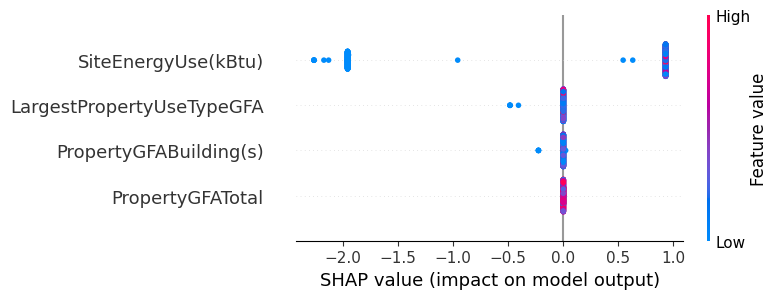

In [59]:
import shap
# Visualisation avec SHAP
explainer = shap.Explainer(best_model.named_steps['regressor'], X_train_selected)
shap_values = explainer(X_test_selected)

# Trame des valeurs de SHAP
shap.summary_plot(shap_values, X_test_selected, feature_names=selected_features)